In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from urllib.parse import urlencode 

%matplotlib inline 


In [35]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
assessments = pd.read_csv(download_url) 

In [36]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/jmJxR8yhwCXlaw' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
courses = pd.read_csv(download_url) 

In [37]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/DYd4M5b_8RETsA' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
studentAssessment = pd.read_csv(download_url)

In [38]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/lqHnH8NOZ458iw' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
studentRegistration = pd.read_csv(download_url)

In [39]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [40]:
# Обычно каждый предмет в семестре включает ряд тестов с оценками, 
# за которыми следует заключительный экзаменационный тест (экзамен)

assessments.query('assessment_type =="Exam"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [41]:
# судя по таблице выше, по каждому предмету (code_module) должны быть экзамены (Exam)

In [42]:
e_learning_1 = assessments.merge(courses, on = ['code_module', 'code_presentation'])
e_learning = studentAssessment.merge(e_learning_1, on='id_assessment')

In [43]:
e_learning.query('assessment_type=="Exam"').code_module.value_counts()

DDD    3044
CCC    1915
Name: code_module, dtype: int64

In [44]:
# но по факту же получается, что экзамемны, а получается и завершенные курсы есть только по предметам DDD и CCC

In [45]:
# для подсчета завершения курсов будем использовать сочетание id_student + id_assessment(Exam), т.е. студент,
# который в определенный семестр учил определенный предмет и сдал экзамен
# перезачтенные экзамены мы не будем учитывать только при рассчете срока сдачи,
# тк у этих экзаменов время сдачи будет отрицательным. В остальных подсчетах перезачтенный экзамен - это обычный экзамен


In [46]:
e_learning['stud_course'] = e_learning['id_student'].astype(str) + '_' + e_learning['id_assessment'].astype(str)
e_learning = e_learning[['stud_course', 'id_assessment', 'id_student','date_submitted', 'is_banked', 'score', 'code_module', 'code_presentation', 'assessment_type', 'date', 'weight', 'module_presentation_length']]

In [47]:
e_learning.stud_course.value_counts().max()

1

In [48]:
# сочетание id_student_id_assessment уникальны, это означает, что все виды тестов в семестре 
# сдают только раз и успешность их сдачи оценивается баллами

In [49]:
e_learning

,stud_course,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
0,11391_1752,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268
1,28400_1752,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,268
2,31604_1752,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,268
3,32885_1752,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,268
4,38053_1752,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...
173907,527538_37443,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0,269
173908,534672_37443,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0,269
173909,546286_37443,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0,269
173910,546724_37443,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0,269


In [50]:
# 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)

In [51]:
# Сдавшими экзамен считаем тех, кто сдал экзамен на 40 баллов и выше или перенес экзамен с прошлых периодов, 
# причем id студента в списке встречается только 1 раз

q1_passing_one_exam = e_learning.query('assessment_type=="Exam" & score>=40') \
                                .groupby("id_student").filter(lambda x: len(x)==1) \
                                .id_student.value_counts().sum()

In [52]:
q1_passing_one_exam # количество студентов, которые успешно сдали только один курс

3802

In [53]:
# 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса,
# которые обладают самой низкой и самой высокой завершаемостью*
# *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [54]:
# кол-во всех попыток сдать экзамен - все строки с Exam
# кол-во успешных экзаменов - все строки с Exam с оценкой score>=40

In [55]:
q2_all_exam_by_id_assessment = e_learning.query('assessment_type=="Exam"') \
                                         .groupby('id_assessment', as_index = False) \
                                         .agg({'score':'count'})
q2_all_exam_by_id_assessment

,id_assessment,score
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524
5,25368,950


In [56]:
q2_ok_exam_by_id_assessment = e_learning.query('assessment_type=="Exam" & score>=40') \
                                        .groupby('id_assessment', as_index = False) \
                                        .agg({'score':'count'})
q2_ok_exam_by_id_assessment

,id_assessment,score
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


In [57]:
q2_most_diffic_easy_exam = q2_all_exam_by_id_assessment.merge(q2_ok_exam_by_id_assessment, on = 'id_assessment') \
                                                          .rename(columns = {'score_x':'all_exam', 'score_y':'ok_exam'})
                                                  
q2_most_diffic_easy_exam['ok_all'] = q2_most_diffic_easy_exam['ok_exam']/q2_most_diffic_easy_exam['all_exam']*100

q2_most_diffic_easy_exam = q2_most_diffic_easy_exam.merge(assessments, on = 'id_assessment')

q2_most_diffic_easy_exam

,id_assessment,all_exam,ok_exam,ok_all,code_module,code_presentation,assessment_type,date,weight
0,24290,747,664,88.888889,CCC,2014B,Exam,NaN,100.0
1,24299,1168,1019,87.243151,CCC,2014J,Exam,NaN,100.0
2,25340,602,504,83.720930,DDD,2013B,Exam,240.0,100.0
3,25354,968,878,90.702479,DDD,2013J,Exam,261.0,100.0
4,25361,524,485,92.557252,DDD,2014B,Exam,241.0,100.0
5,25368,950,842,88.631579,DDD,2014J,Exam,NaN,100.0


In [58]:
#  самый простой экзамен (id_assessment, code_module, code_presentation)

In [59]:
q2_most_diffic_easy_exam[q2_most_diffic_easy_exam['ok_all'] == q2_most_diffic_easy_exam['ok_all']. max ()]

,id_assessment,all_exam,ok_exam,ok_all,code_module,code_presentation,assessment_type,date,weight
4,25361,524,485,92.557252,DDD,2014B,Exam,241.0,100.0


In [60]:
#  самый сложный экзамен (id_assessment, code_module, code_presentation)

In [61]:
q2_most_diffic_easy_exam[q2_most_diffic_easy_exam['ok_all'] == q2_most_diffic_easy_exam['ok_all']. min ()]

,id_assessment,all_exam,ok_exam,ok_all,code_module,code_presentation,assessment_type,date,weight
2,25340,602,504,83.72093,DDD,2013B,Exam,240.0,100.0


In [62]:
# 3. По каждому предмету определи средний срок сдачи экзаменов 
# (под сдачей понимаем последнее успешное прохождение экзамена студентом)

In [63]:
# Сдавшими экзамен считаем тех, кто сдал экзамен на 40 баллов и выше(score>=40), при этом мы не учитываем перезачтенные 
# экзамены, тк у них дата сдачи отрицательная

In [64]:
q3_avg_exam_time = e_learning.query('assessment_type=="Exam" & score>=40 & is_banked!=1' ) \
                             .groupby('code_module', as_index = False) \
                             .agg({'date_submitted':'mean'})          

In [65]:
q3_avg_exam_time  # средний срок сдачи экзаменов

,code_module,date_submitted
0,CCC,239.345217
1,DDD,237.976006


In [66]:
# 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них.
# А также предметы с самым большим оттоком (ТОП-3)

In [67]:
# в качестве зарегистрировавшихся мы берем всех студентов таблицы, включая тех, у кого в поле date_registration Nan,
# тк среди этих студентов есть те, кто отписался от курса, а значит был записан.

# в качестве отписавшихся берем всех, у кого date_unregistration не Nan.

In [68]:
q4_all_regist_subj = studentRegistration.groupby('code_module', as_index = False) \
                                        .agg({'date_registration':'count'})

In [69]:
q4_all_regist_subj

,code_module,date_registration
0,AAA,748
1,BBB,7900
2,CCC,4426
3,DDD,6257
4,EEE,2932
5,FFF,7751
6,GGG,2534


In [70]:
q4_all_unregist_subj = studentRegistration.query('date_unregistration!="Nan"') \
                                          .groupby('code_module', as_index = False) \
                                          .agg({'date_unregistration':'count'})

In [71]:
q4_all_unregist_subj

,code_module,date_unregistration
0,AAA,126
1,BBB,2377
2,CCC,1947
3,DDD,2235
4,EEE,718
5,FFF,2380
6,GGG,289


In [72]:
q4_like_disl_subj = q4_all_regist_subj.merge(q4_all_unregist_subj, on = 'code_module')

In [73]:
q4_like_disl_subj['percent_dislike'] = q4_like_disl_subj['date_unregistration'] /q4_like_disl_subj['date_registration'] *100

In [74]:
q4_like_disl_subj = q4_like_disl_subj.sort_values('percent_dislike', ascending = False)

In [75]:
q4_like_disl_subj

,code_module,date_registration,date_unregistration,percent_dislike
2,CCC,4426,1947,43.990059
3,DDD,6257,2235,35.719994
5,FFF,7751,2380,30.705715
1,BBB,7900,2377,30.088608
4,EEE,2932,718,24.488404
0,AAA,748,126,16.844920
6,GGG,2534,289,11.404893


In [76]:
q4_like_disl_subj.tail(3) # cамые популярные предметы

,code_module,date_registration,date_unregistration,percent_dislike
4,EEE,2932,718,24.488404
0,AAA,748,126,16.844920
6,GGG,2534,289,11.404893


In [77]:
q4_like_disl_subj.head(3) # предметы с самым большим оттоком

,code_module,date_registration,date_unregistration,percent_dislike
2,CCC,4426,1947,43.990059
3,DDD,6257,2235,35.719994
5,FFF,7751,2380,30.705715


In [78]:
# 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов 
# и самыми долгими средними сроками сдачи курсов
# завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [79]:
e_learning.code_presentation.value_counts() # все данные входят в период 2013-2014 годов

2014J    52174
2013J    49018
2014B    38896
2013B    33824
Name: code_presentation, dtype: int64

In [80]:
q5_all_exam_by_code_pres = e_learning.query('assessment_type=="Exam"') \
                                         .groupby('code_presentation', as_index = False) \
                                         .agg({'score':'count'})
q5_all_exam_by_code_pres

,code_presentation,score
0,2013B,602
1,2013J,968
2,2014B,1271
3,2014J,2118


In [81]:
q5_ok_exam_by_code_pres = e_learning.query('assessment_type=="Exam" & score>=40') \
                                        .groupby('code_presentation', as_index = False) \
                                        .agg({'score':'count'})
q5_ok_exam_by_code_pres

,code_presentation,score
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


In [82]:
q5_most_diffic_easy_exam = q5_all_exam_by_code_pres.merge(q5_ok_exam_by_code_pres, on = 'code_presentation') \
                                                          .rename(columns = {'score_x':'all_exam', 'score_y':'ok_exam'})

In [83]:
q5_most_diffic_easy_exam

,code_presentation,all_exam,ok_exam
0,2013B,602,504
1,2013J,968,878
2,2014B,1271,1149
3,2014J,2118,1861


In [84]:
q5_most_diffic_easy_exam['ok_all'] = q5_most_diffic_easy_exam['ok_exam']/q5_most_diffic_easy_exam['all_exam']*100

In [85]:
q5_most_diffic_easy_exam

,code_presentation,all_exam,ok_exam,ok_all
0,2013B,602,504,83.720930
1,2013J,968,878,90.702479
2,2014B,1271,1149,90.401259
3,2014J,2118,1861,87.865911


In [86]:
 #  семестр с самой низкой завершаемостью курсов

In [87]:
q5_most_diffic_easy_exam[q5_most_diffic_easy_exam['ok_all'] == q5_most_diffic_easy_exam['ok_all']. min ()]

,code_presentation,all_exam,ok_exam,ok_all
0,2013B,602,504,83.72093


In [88]:
# выбираем только строки с оценками 40 и больше (score >=40),  при этом мы не учитываем перезачтенные тесты,
# тк у них дата сдачи отрицательная и считаем среднюю дату сдачи (date_submittedscore)

In [89]:
q5_long_complete_presen = e_learning.query('assessment_type=="Exam" & score>=40 & is_banked!=1') \
                                    .groupby('code_presentation', as_index = False) \
                                    .agg({'date_submitted':'mean'})

In [90]:
q5_long_complete_presen

,code_presentation,date_submitted
0,2013B,230.164683
1,2013J,239.509112
2,2014B,232.997389
3,2014J,243.680279


In [91]:
#семестр с самыми долгими средними сроками сдачи курсов

In [92]:
q5_long_complete_presen[q5_long_complete_presen['date_submitted'] == q5_long_complete_presen['date_submitted']. max ()]

,code_presentation,date_submitted
3,2014J,243.680279


In [93]:
# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, 
# построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. 
# В адаптированной кластеризации можешь выбрать следующие метрики: 
# R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен.
# Подробно опиши, как ты создавал кластеры. 
# Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

In [94]:
# R - среднее время сдачи одного экзамена

In [95]:
e_learning_q6_R =  e_learning.query('assessment_type=="Exam" & score>=40' ) \
                             .groupby('id_student', as_index = False) \
                             .agg({'date_submitted':'mean'}) \
                             .rename(columns = {'date_submitted':'mean_date_submitted'})

In [96]:
lst_R = e_learning_q6_R.mean_date_submitted.describe().round()

In [97]:
lst_R

count    4097.0
mean      238.0
std         6.0
min       229.0
25%       234.0
50%       241.0
75%       243.0
max       285.0
Name: mean_date_submitted, dtype: float64

In [98]:
e_learning_q6_R['R_lst'] = pd.cut(e_learning_q6_R.mean_date_submitted,[0, lst_R[4], lst_R[5], lst_R[6], lst_R[7]], labels=[1, 2, 3, 4])

In [99]:
e_learning_q6_R['R_lst'] = e_learning_q6_R.R_lst.astype('int64')

In [100]:
e_learning_q6_R.dtypes

id_student               int64
mean_date_submitted    float64
R_lst                    int64
dtype: object

In [101]:
e_learning_q6_R = e_learning_q6_R[['id_student', 'R_lst']]

In [102]:
# F - завершаемость курсов

In [103]:
e_learning_q6_F1 = e_learning.query('assessment_type=="Exam"' ) \
                             .groupby('id_student', as_index = False) \
                             .agg({'score':'count'})                             

In [104]:
e_learning_q6_F2 = e_learning.query('assessment_type=="Exam" & score>=40') \
                             .groupby('id_student', as_index = False) \
                             .agg({'score':'count'})                             

In [105]:
e_learning_q6_F = e_learning_q6_F1.merge(e_learning_q6_F2, how = 'left', on = 'id_student') \
                                  .rename(columns = {'score_x':'all_exam', 'score_y':'ok_exam'})

e_learning_q6_F['ok_all'] = e_learning_q6_F['ok_exam']/e_learning_q6_F['all_exam']*100
e_learning_q6_F = e_learning_q6_F.fillna(0)

In [106]:
lst_F = e_learning_q6_F.ok_all.value_counts()

In [107]:
lst_F

100.0    4069
0.0       536
50.0       28
Name: ok_all, dtype: int64

In [108]:
e_learning_q6_F['F_lst'] = pd.cut(e_learning_q6_F.ok_all,[-1, 50, 100], labels= [1, 2])

In [109]:
e_learning_q6_F['F_lst'] = e_learning_q6_F.F_lst.astype('int64')

In [110]:
e_learning_q6_F.dtypes

id_student      int64
all_exam        int64
ok_exam       float64
ok_all        float64
F_lst           int64
dtype: object

In [111]:
e_learning_q6_F = e_learning_q6_F[['id_student', 'F_lst']]

In [112]:
# M - среднее количество баллов, получаемое за экзамен

In [113]:
e_learning_q6_M =  e_learning.query('assessment_type=="Exam"') \
                             .groupby('id_student', as_index = False) \
                             .agg({'score':'mean'}) \
                             .rename(columns = {'score':'mean_score'})

In [114]:
lst_M = e_learning_q6_M.mean_score.describe().round()

In [115]:
lst_M

count    4633.0
mean       65.0
std        20.0
min         0.0
25%        50.0
50%        66.0
75%        82.0
max       100.0
Name: mean_score, dtype: float64

In [116]:
e_learning_q6_M['M_lst'] = pd.cut(e_learning_q6_M.mean_score,[-1, lst_M[4], lst_M[5], lst_M[6], lst_M[7]], labels=[1, 2, 3, 4])

In [117]:
e_learning_q6_M['M_lst'] = e_learning_q6_M.M_lst.astype('int64')

In [118]:
e_learning_q6_M.dtypes

id_student      int64
mean_score    float64
M_lst           int64
dtype: object

In [119]:
e_learning_q6_M = e_learning_q6_M[['id_student', 'M_lst']]

In [120]:
e_learning_q6 = e_learning_q6_M.merge(e_learning_q6_F, how = 'left', on = 'id_student') \
                               .merge(e_learning_q6_R, how = 'left', on = 'id_student') 

e_learning_q6 = e_learning_q6[['id_student', 'R_lst','F_lst','M_lst']] .fillna(0)

e_learning_q6['R_lst'] = e_learning_q6.R_lst.astype('int64')

In [121]:
e_learning_q6

,id_student,R_lst,F_lst,M_lst
0,23698,3,2,3
1,24213,2,2,2
2,27116,3,2,4
3,28046,2,2,1
4,28787,3,2,1
...,...,...,...,...
4628,2694886,2,2,3
4629,2694933,1,2,3
4630,2695608,2,2,3
4631,2697181,1,2,3


In [122]:
e_learning_q6.dtypes

id_student    int64
R_lst         int64
F_lst         int64
M_lst         int64
dtype: object

In [123]:
e_learning_q6['RFM'] = e_learning_q6['R_lst'].astype(str) + '_' + e_learning_q6['F_lst'].astype(str)+ '_'+ e_learning_q6['M_lst'].astype(str)

In [124]:
e_learning_q6.sort_values('RFM', ascending = False)

,id_student,R_lst,F_lst,M_lst,RFM
3107,627527,4,2,4,4_2_4
3904,687411,4,2,4,4_2_4
331,257887,4,2,4,4_2_4
3919,688281,4,2,4,4_2_4
3921,688356,4,2,4,4_2_4
...,...,...,...,...,...
2102,577235,0,1,1,0_1_1
2104,577245,0,1,1,0_1_1
358,269388,0,1,1,0_1_1
2107,577458,0,1,1,0_1_1


In [125]:
# R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен

In [126]:
e_learning_q6_RFM = e_learning_q6.groupby('RFM', as_index = False) \
                                 .agg({'id_student':'count'}) \
                                 .rename(columns = {'id_student':'count_RFM'}) \
                                 .sort_values('RFM', ascending = False)

In [127]:
e_learning_q6_RFM ['perc_count_RFM'] = e_learning_q6_RFM.count_RFM.apply(lambda x: x/e_learning_q6_RFM.count_RFM.sum()*100).round(1)

In [128]:
e_learning_q6_RFM

,RFM,count_RFM,perc_count_RFM
22,4_2_4,301,6.5
21,4_2_3,195,4.2
20,4_2_2,204,4.4
19,4_2_1,122,2.6
18,3_2_4,244,5.3
17,3_2_3,357,7.7
16,3_2_2,350,7.6
15,3_2_1,163,3.5
14,3_1_2,1,0.0
13,3_1_1,2,0.0


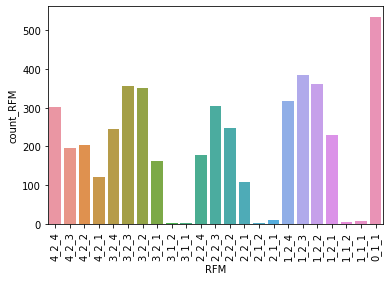

In [129]:
ax = sns.barplot(data=e_learning_q6_RFM, x='RFM', y='count_RFM', hue=None)
ax.tick_params(axis='x', labelrotation=90)

In [130]:
# отличники (e_learning_q6_RFM_5) - студенты, успешно завершившие  все курсы за минимаотное время и/или с максимальной оценкой

# 4_2_4
# 4_2_3
# 3_2_4
# 3_2_3
# 2_2_4

In [131]:
e_learning_q6_RFM_5 = [ '4_2_4', '4_2_3', '3_2_4', '3_2_3', '2_2_4']
e_learning_q6_RFM_5

['4_2_4', '4_2_3', '3_2_4', '3_2_3', '2_2_4']

In [132]:
# хорошисты (e_learning_q6_RFM_4) - студенты, успешно завершившие  все курсы , но у которых нужно поработать 
# либо над скоростью  сдачи и/или оценкой

# 4_2_2
# 3_2_2
# 2_2_3
# 2_2_2
# 1_2_4
# 1_2_3

In [133]:
e_learning_q6_RFM_4 = [ '4_2_2', '3_2_2', '2_2_3', '2_2_2', '1_2_4', '1_2_3']
e_learning_q6_RFM_4

['4_2_2', '3_2_2', '2_2_3', '2_2_2', '1_2_4', '1_2_3']

In [134]:
# троечники (e_learning_q6_RFM_3) - студенты, успешно завершившие  все курсы , но имеют самые низкие оценки на потоке 
# и/или среднюю либо низкую скорость сдачи 

# 4_2_1
# 3_2_1
# 2_2_1
# 1_2_2
# 1_2_1

In [135]:
e_learning_q6_RFM_3 = [ '4_2_1', '3_2_1', '2_2_1', '1_2_2', '1_2_1']
e_learning_q6_RFM_3

['4_2_1', '3_2_1', '2_2_1', '1_2_2', '1_2_1']

In [136]:
# двоечники (e_learning_q6_RFM_2) - студенты, не смогли успешно завершить все курсы имеют самые низкие оценки на потоке

# 3_1_2
# 3_1_1
# 2_1_2
# 2_1_1
# 1_1_2
# 1_1_1
# 0_1_1

In [137]:
e_learning_q6_RFM_2 = [ '3_1_2', '3_1_1', '2_1_2', '2_1_1', '1_1_2', '1_1_1', '0_1_1']
e_learning_q6_RFM_2

['3_1_2', '3_1_1', '2_1_2', '2_1_1', '1_1_2', '1_1_1', '0_1_1']

In [138]:
e_learning_q6_RFM['RFM_range'] = e_learning_q6_RFM.RFM.apply(lambda x: 'e_learning_q6_RFM_5' if x in e_learning_q6_RFM_5 else 'e_learning_q6_RFM_4' if x in e_learning_q6_RFM_4 else 'e_learning_q6_RFM_3' if x in e_learning_q6_RFM_3 else 'e_learning_q6_RFM_2')

In [139]:
e_learning_q6_RFM_range = e_learning_q6_RFM.groupby('RFM_range', as_index = False) \
                                           .agg({'count_RFM':'sum'}) \
                                           .sort_values('RFM_range', ascending = False)

In [140]:
e_learning_q6_RFM_range ['perc_count_RFM'] = e_learning_q6_RFM_range.count_RFM.apply(lambda x: x/e_learning_q6_RFM_range.count_RFM.sum()*100).round(1)

In [141]:
e_learning_q6_RFM_range

,RFM_range,count_RFM,perc_count_RFM
3,e_learning_q6_RFM_5,1275,27.5
2,e_learning_q6_RFM_4,1808,39.0
1,e_learning_q6_RFM_3,986,21.3
0,e_learning_q6_RFM_2,564,12.2


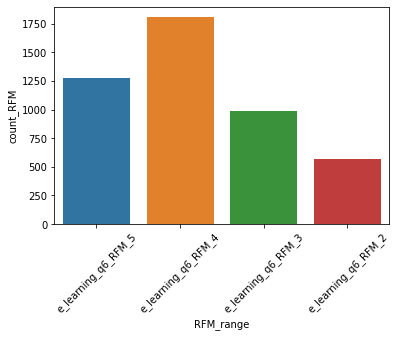

In [142]:
ax = sns.barplot(data=e_learning_q6_RFM_range, x='RFM_range', y='count_RFM', hue=None)
ax.tick_params(axis='x', labelrotation=45)

In [143]:
# также добавим RFM_range в DF со студентами, чтобы можно было работать с ними поименно

In [144]:
e_learning_q6 ['RFM_range'] = e_learning_q6.RFM.apply(lambda x: 'e_learning_q6_RFM_5' if x in e_learning_q6_RFM_5 else 'e_learning_q6_RFM_4' if x in e_learning_q6_RFM_4 else 'e_learning_q6_RFM_3' if x in e_learning_q6_RFM_3 else 'e_learning_q6_RFM_2')

In [145]:
e_learning_q6

,id_student,R_lst,F_lst,M_lst,RFM,RFM_range
0,23698,3,2,3,3_2_3,e_learning_q6_RFM_5
1,24213,2,2,2,2_2_2,e_learning_q6_RFM_4
2,27116,3,2,4,3_2_4,e_learning_q6_RFM_5
3,28046,2,2,1,2_2_1,e_learning_q6_RFM_3
4,28787,3,2,1,3_2_1,e_learning_q6_RFM_3
...,...,...,...,...,...,...
4628,2694886,2,2,3,2_2_3,e_learning_q6_RFM_4
4629,2694933,1,2,3,1_2_3,e_learning_q6_RFM_4
4630,2695608,2,2,3,2_2_3,e_learning_q6_RFM_4
4631,2697181,1,2,3,1_2_3,e_learning_q6_RFM_4
